In [118]:
#Import the neccessary Libraries
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [54]:
#Read the data as a dataframe
banking = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [55]:
#Shape of the data
banking.shape

(5000, 14)

In [56]:
#Data Type of each attribute
banking.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [57]:
#Look of the data

banking.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [58]:
#Checking the presence of null values

#Method1 
banking.dropna

#Method2
banking.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [59]:
#Exploratory Data Analysis
banking.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Inferences from the Exploratory data analysis
1. Data types of all the columns are either integer or float 
2. All the columns have numeric real data and there is no presence of null values or ?
3. However, from describe() function, it is understood that 'Experience' column has negative value and experience can't be negative value
4. 'ID' column is just a numerical representation of the number of records present in the data set and hence, adds no value to the data set
5. Columns such as 'Age', 'Experience', 'Income' are continuous variables whereas columns such as 'Personal Loan', 'Securities Account', 'CD Account', 'Online' and 'Credit card' are binary variables with 0 and 1 as variables and the columns such as 'Zip Code', 'Family' are categorical variables

In [60]:
#To get the negative values from the data set
banking[banking < 0].count()

#Inference: It is understood that there are 52 negative values in 'Experience' column and that needs to be replaced 
#with the median of 'Experience' column

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [61]:
#Replacing the negative values of 'Experience' column with median
banking[banking < 0] = banking["Experience"].median()
banking[banking < 0].count()

#Inference: Now, there are no negative values observed in 'Experience' column

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [62]:
#Checking the 5 point summary/Exploratory Data Analysis again
banking.describe().T

#Inference: Now, minimum value is 0 and slight improvement in mean and median of 'Experience' column

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


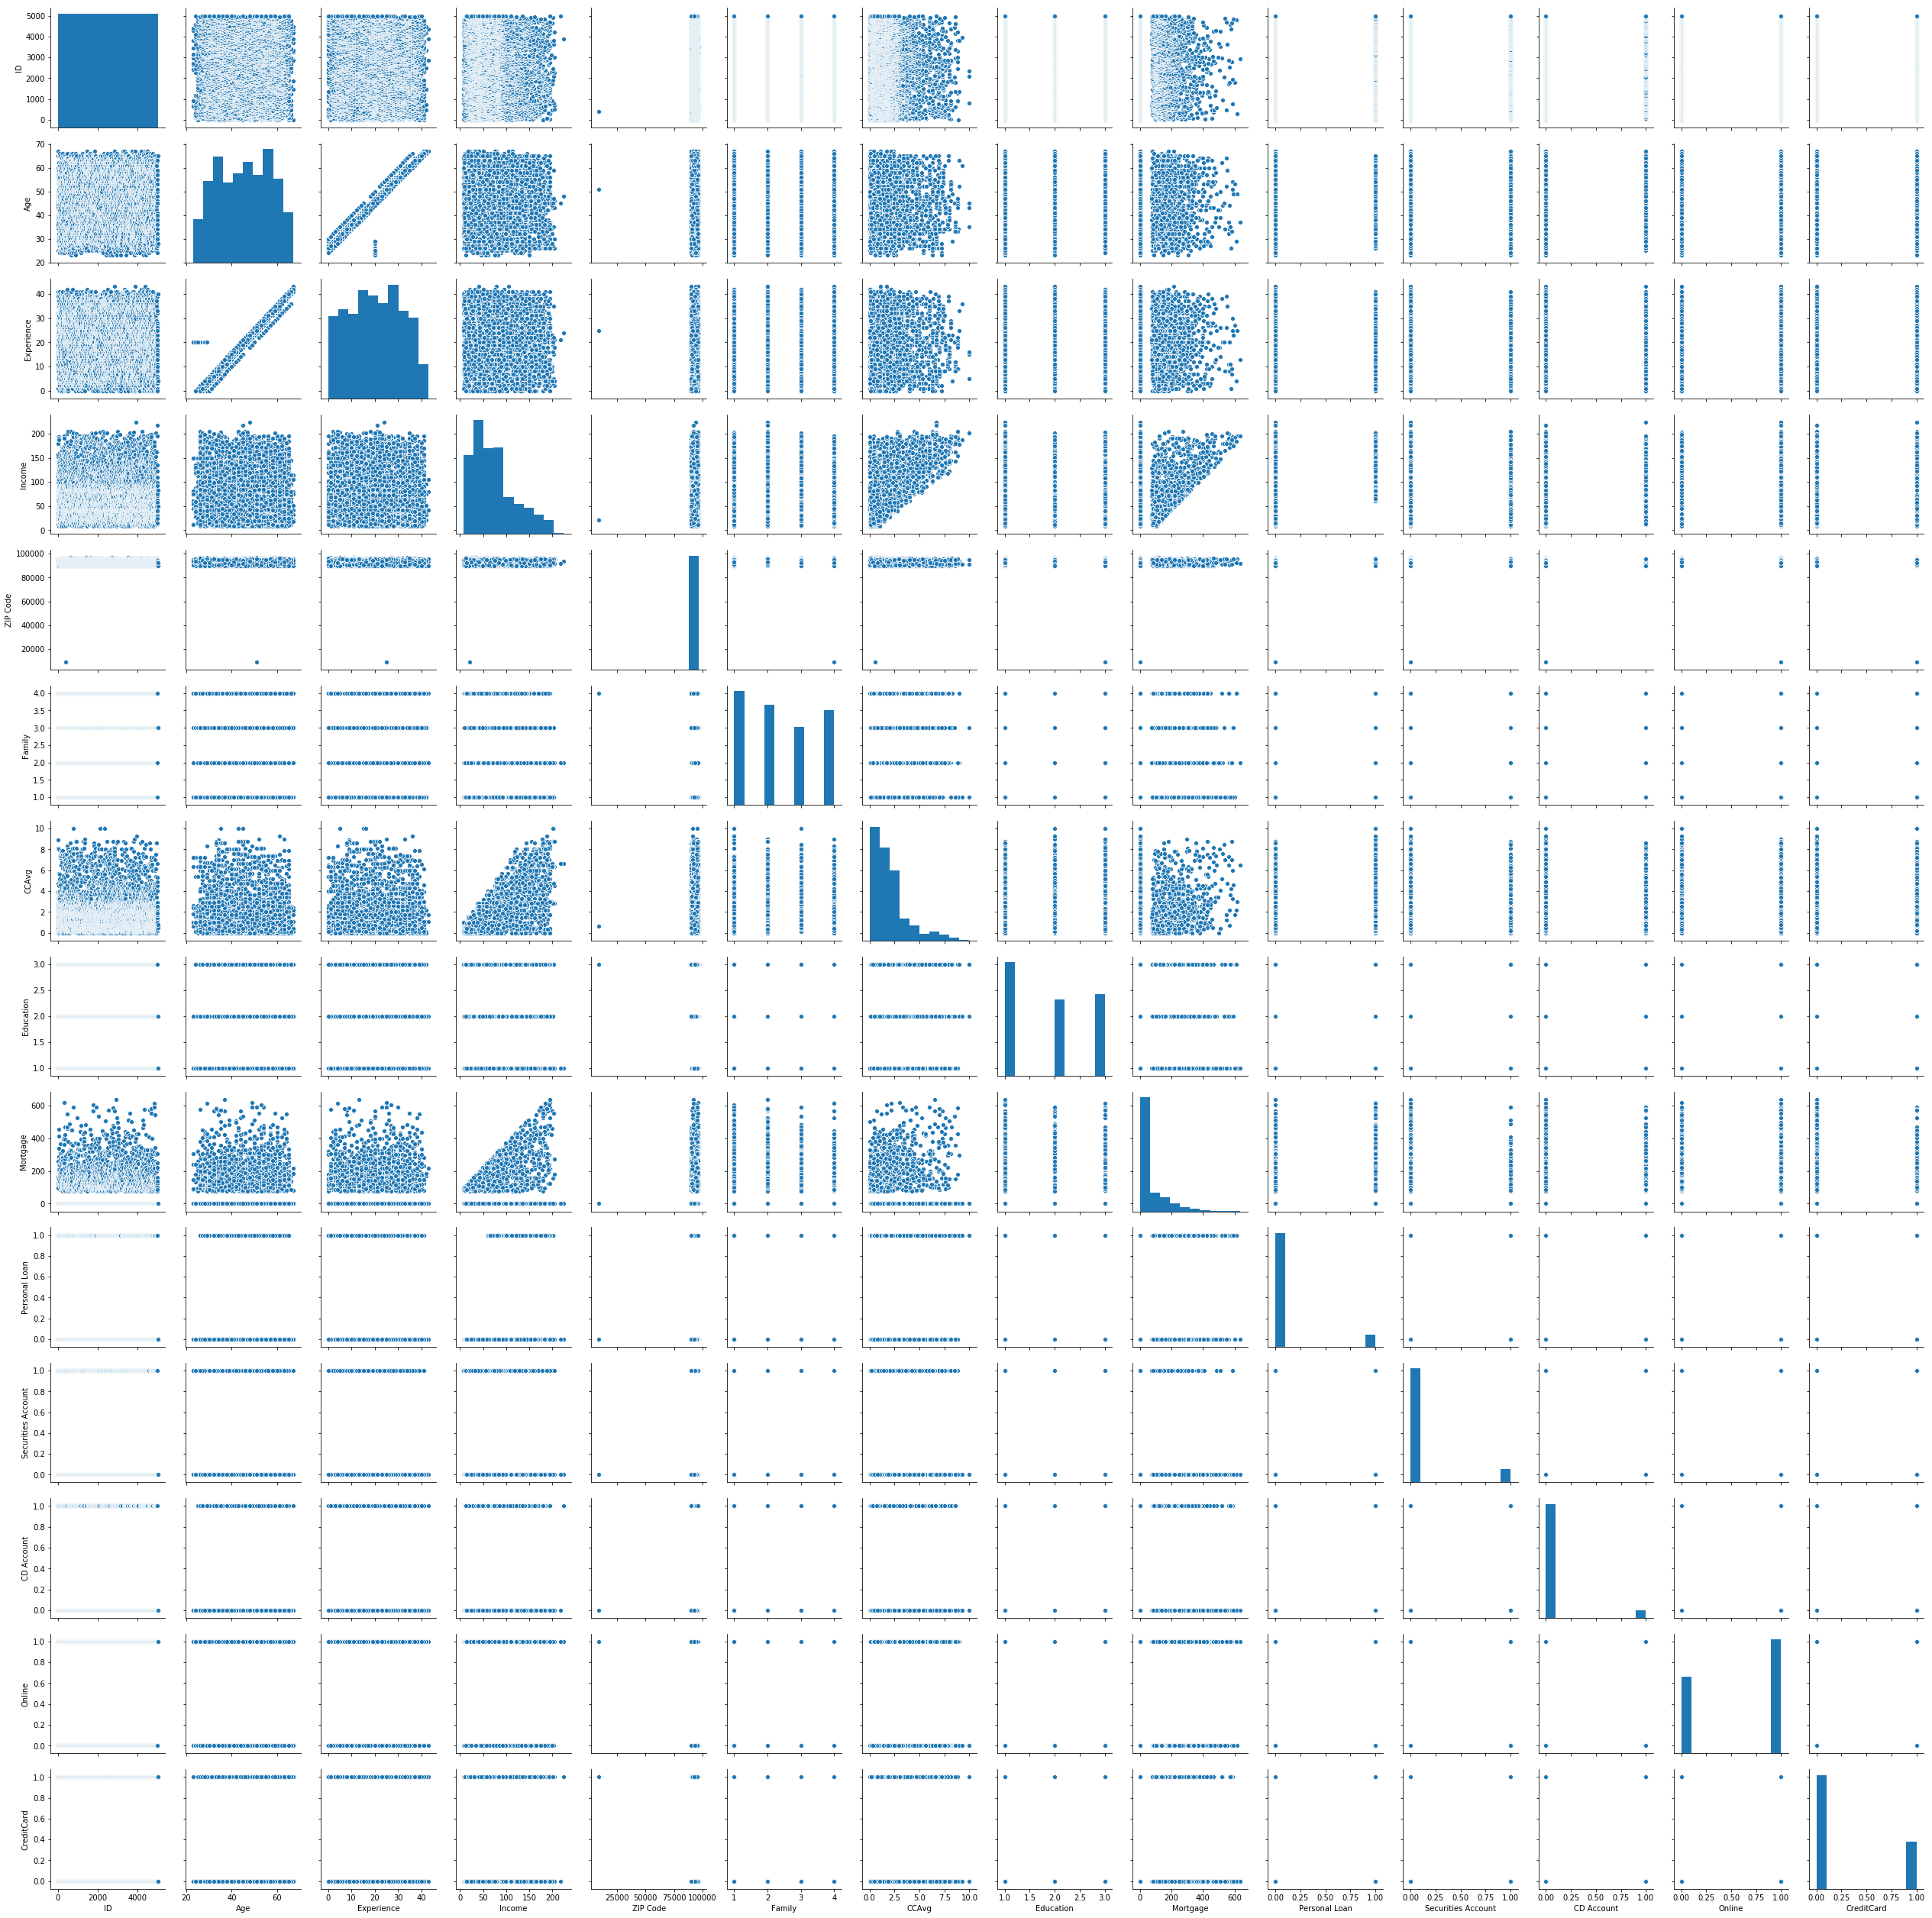

In [63]:
#Distribution of data across columns
sns.pairplot(banking)

### Inferences from data distribution of each attribute

1. 'Age' and 'Experience' Columns/Continuous variables  seem to have a normal distribution
2. 'Income', 'CCAvg', 'Mortgage' are skewed and hence have outliers
3. 'Age' and 'Experience' have linearly correlated with each other 
4. 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'Credit Card' columns have binary values 
5. 'ZIP Code', 'Family' and 'Education' are categorical variables

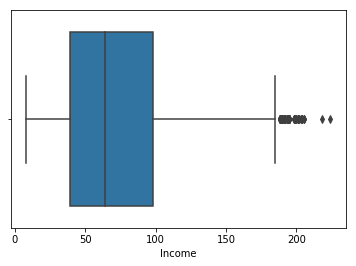

In [141]:
#To check the presence of outliers in 'Income' column
sns.boxplot(banking['Income'])

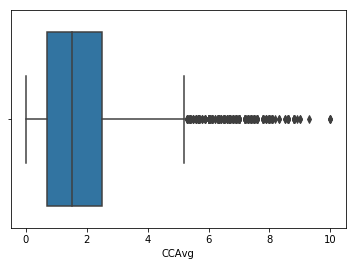

In [65]:
#To check the presence of outliers in 'CCAvg' column
sns.boxplot(banking['CCAvg'])

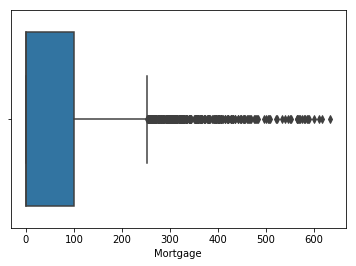

In [66]:
#To check the presence of outliers in 'Mortgage' column
sns.boxplot(banking['Mortgage'])

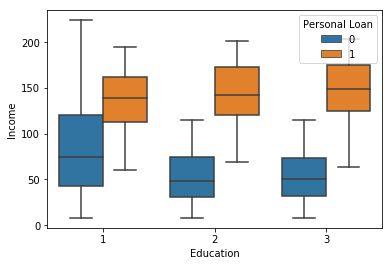

In [67]:
#To check the impact of 'Personal Loan' on 'Education' and 'Income'
sns.boxplot(banking['Education'], banking['Income'], hue=banking['Personal Loan'])

#Inference: Higher the income across the education levels, higher the chances of customer buying Personal Loans

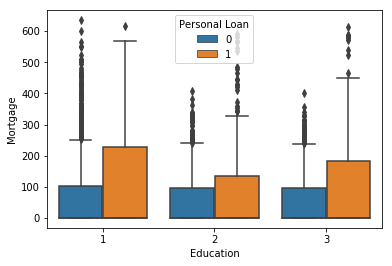

In [147]:
#To check the impact of 'Personal Loan' on 'Income' and 'Mortgage'
sns.boxplot(banking['Education'], banking['Mortgage'], hue=banking['Personal Loan'])

#Inference: Across the education levels, higher the 'Mortgage', higher is the chance of the customer 
#buying 'Personal Loans'

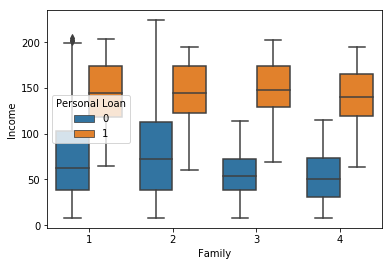

In [146]:
#To check the impact of 'Personal Loan' on 'Income' and 'Family'
sns.boxplot(banking['Family'], banking['Income'], hue=banking['Personal Loan'])

##Inference: Higher the income across the family, higher the chances of customer buying Personal Loans

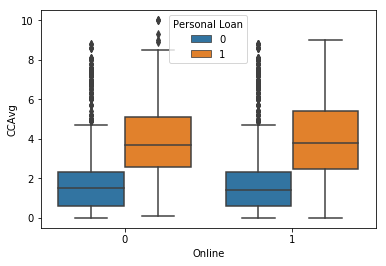

In [158]:
#To check the impact of 'Personal Loan' on 'Online' and 'CCAvg'
sns.boxplot(banking['Online'], banking['CCAvg'], hue=banking['Personal Loan'])

#Inference: Higher the CCAvg across Online values, higher the chances of customer buying 'Personal Loan'

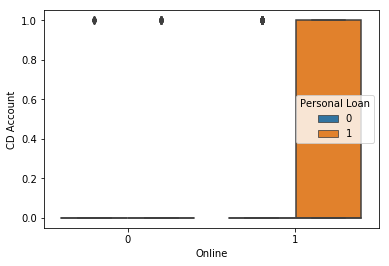

In [72]:
sns.boxplot(banking['Online'], banking['CD Account'],hue=banking['Personal Loan'])

#Inference: Customers using Online(Internet Banking) and CD Account have also bought Personal Loan

In [73]:
#Removing 'ID' column from the dataset as it doesnt add any value to the model
banking = banking.drop(labels = "ID", axis = 1)

In [74]:
#Look of the data post removing 'ID' column
banking.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [75]:
#Checking the count of Target (Personal Loan) column
banking.groupby(["Personal Loan"]).count()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


In [76]:
#Creating a separate dataframe for target/dependent column
banking_target = banking['Personal Loan']

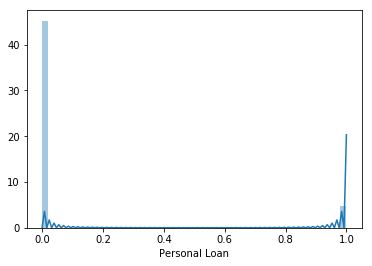

In [161]:
#Distribution of Target column ('Personal Loan')
sns.distplot(banking_target)

#Inference: The distribution is binary having 0 and 1 as the value

In [77]:
#Creating a separate dataframe for independent columns 
banking_Independent = banking
banking_Independent.shape

(5000, 13)

In [78]:
#Removing 'Personal Loan' column from Independent columns dataframe
banking_Independent = banking_Independent.drop(labels = "Personal Loan", axis = 1)

In [80]:
#Checking the shape of the Independent columns data set post removing 'Personal Loan' column
banking_Independent.shape

(5000, 12)

In [82]:
banking_Independent.head(10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,0,0,0,0


## Applying Logistic regression model

In [96]:
#Applying Logistic Regression
X = np.array(banking_Independent)
y = np.array(banking_target)
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [97]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
#Predicting model score and Confusion matrix
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))


0.9073333333333333
[[1318   33]
 [ 106   43]]


### Tuning Logistic Regression Model

### i) By Removing 'Experience' column as 'Age' and 'Experience' are linearly correlated

In [99]:
#Further tuning the logistic regression model
#Since Age and experience are linearly correlated removing experience from the data set
banking_Independent = banking_Independent.drop(labels = "Experience", axis = 1)

In [100]:
#Applying Logistic Regression
X = np.array(banking_Independent)
y = np.array(banking_target)
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [101]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [102]:
#Predicting model score and Confusion matrix
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.916
[[1321   30]
 [  96   53]]


### ii) By scaling all the columns

In [106]:
#scale all the columns 
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.9473333333333334
[[1333   18]
 [  61   88]]


/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### iii) By applying z-score

In [140]:
banking_Independent_z = banking_Independent.apply(zscore)
#Applying Logistic Regression
X = np.array(banking_Independent)
y = np.array(banking_target)
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
#Predicting model score and Confusion matrix
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.916
[[1321   30]
 [  96   53]]


/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Applying Naive Bayesian

In [108]:
#Applying GaussianNB 
X = np.array(banking_Independent)
y = np.array(banking_target)
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [113]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
model_score = model.score(X_test, y_test)
print(model_score)
#print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8833333333333333
[[1241  110]
 [  65   84]]


### Tuning Naive Bayesian Model

In [115]:
#scale all the columns 
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
# Fit the model on 30%
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)
print(metrics.confusion_matrix(expected, predicted))

0.8686666666666667
[[1241  110]
 [  65   84]]


### Applying scale all the columns reduced the overall model score hence reverting back to the original Naive Bayesian model

In [116]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
model_score = model.score(X_test, y_test)
print(model_score)
#print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8833333333333333
[[1241  110]
 [  65   84]]


## Applying KNN Model

In [134]:
# Altered the n_neighbours and weights parameter
NNH = KNeighborsClassifier(n_neighbors= 4 , weights = 'distance' )

In [135]:
# Call Nearest Neighbour algorithm
X = np.array(banking_Independent)
y = np.array(banking_target)
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [136]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
# Printing the model score and confusion matrix

predicted_labels = NNH.predict(X_test)
model_score = NNH.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.8953333333333333
[[1303   48]
 [ 109   40]]


### Tuning KNN Model

### i) By scaling all the columns

In [137]:
#scale all the columns 
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
# Fit the model on 30%
NNH.fit(X_train_scaled, y_train)
y_predict = NNH.predict(X_test_scaled)
model_score = NNH.score(X_test_scaled, y_test)
print(model_score)
print(metrics.confusion_matrix(expected, predicted))

0.95
[[1241  110]
 [  65   84]]


### ii) By applying z-score

In [139]:
banking_Independent_z = banking_Independent.apply(zscore)
# Call Nearest Neighbour algorithm
X = np.array(banking_Independent_z)
y = np.array(banking_target)
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
model_score = NNH.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9506666666666667
[[1338   13]
 [  61   88]]


## Inferences across the models (Logistic Regression, Naive Bayes, KNN)

1. Across the 3 models, Logistic Regression and KNN models have higher model scores when compared to Naive Bayes
2. Before tuning Logistic Regression and KNN, the model scores were 0.916 and 0.895 respectively and after tuning the models by scaling all the columns, the scores improved to 0.947 and 0.95 respectively
3. Applying Z-scores(normalization) to the data set didnt improve the overall model scores but increased the efficiency of the confusion matrix across the models
4. KNN and Logistic Regression gave similar results after tuning